# Vizualizace dat




**Knihovna Matplotlib**


https://matplotlib.org/

Nízko úrovňová knihovna, umožňuje kontrolu nad každým prvkem grafu (osy, legenda, popisy).

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

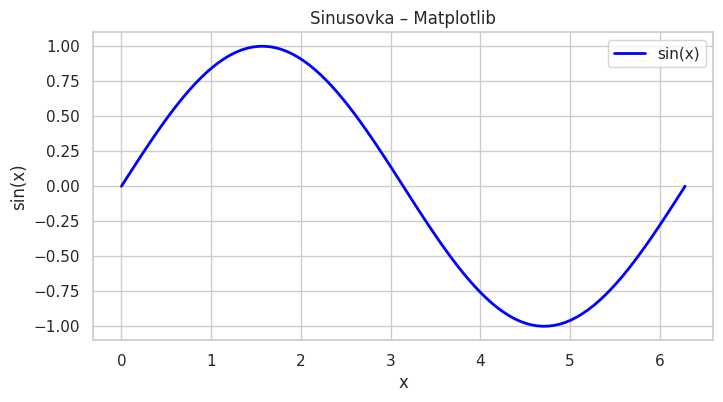

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

# Data
x = np.linspace(0, 2 * np.pi, 100)
y = np.sin(x)

# Graf
plt.figure(figsize=(8,4))
plt.plot(x, y, color='blue', linewidth=2, label='sin(x)')
plt.title('Sinusovka – Matplotlib')
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.legend()
plt.grid(True)
plt.show()


**Knihovna** **Seaborn**

https://seaborn.pydata.org/

Vyšší úroveň stavěná na matplotlibu, pro statistickou vizualizaci (korelace, rozložení...).



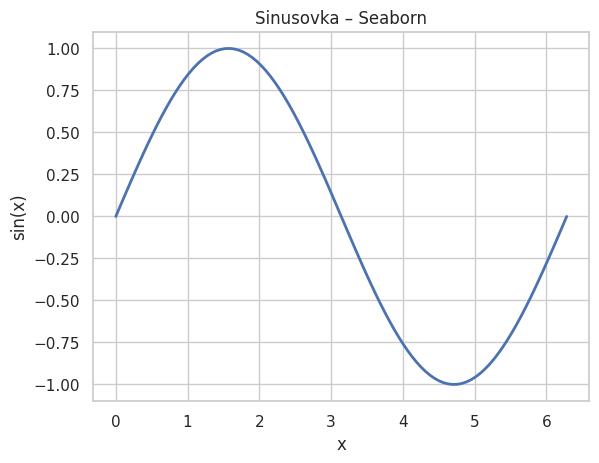

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np

# Data ve formátu DataFrame
x = np.linspace(0, 2 * np.pi, 100)
df = pd.DataFrame({'x': x, 'sin(x)': np.sin(x)})

sns.set(style="whitegrid", palette="deep")

# Graf
sns.lineplot(data=df, x='x', y='sin(x)', linewidth=2)
plt.title('Sinusovka – Seaborn')
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.show()



# **Obecný dataset IRIS**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Načtení datasetu Iris
from seaborn import load_dataset
df = load_dataset("iris")
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


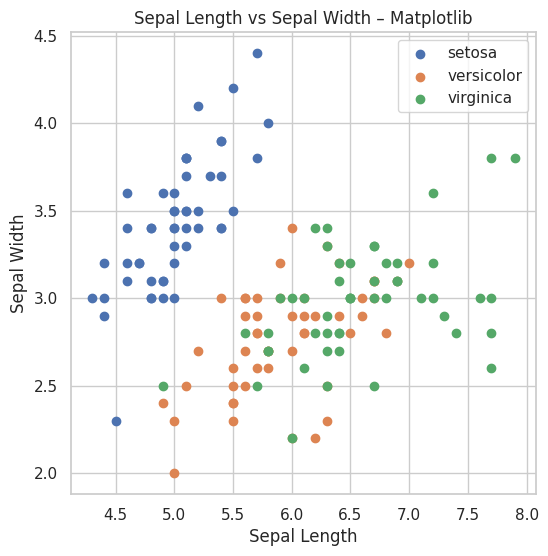

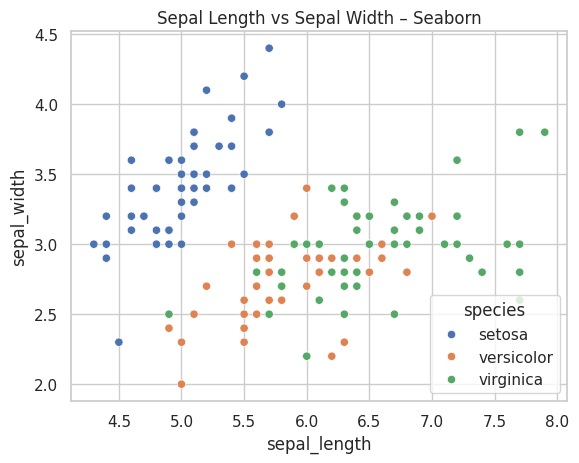

In [ ]:
# Matplotlib
plt.figure(figsize=(6,6))
for species in df['species'].unique():
    subset = df[df['species'] == species]
    plt.scatter(subset['sepal_length'], subset['sepal_width'], label=species)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Sepal Length vs Sepal Width – Matplotlib')
plt.legend()
plt.show()

# Seaborn
sns.scatterplot(data=df, x='sepal_length', y='sepal_width', hue='species')
plt.title('Sepal Length vs Sepal Width – Seaborn')
plt.show()


# **Vykleslování subplotů - více grafů v jednom obrázku**

**1. Způsob**

Syntaxe -> plt.subplot(n_rows, n_cols, index)

- n_rows - počet řádků do kterých chceme grafy rozdělit

- n_cols - počet sloupců

- index - pozice konkrétního grafu (zleva doprava, shora dolů)

**2. Způsob**

Využívá 2D pole (numpy array) -> axes[row, col]

- axes[0, 0] - první řádek, první sloupec

- axes[0, 1] - první řádek, druhý sloupec

- axes[1, 0] - druhý řádek, první sloupec

- axes[1, 1] - druhý řádek, druhý sloupec


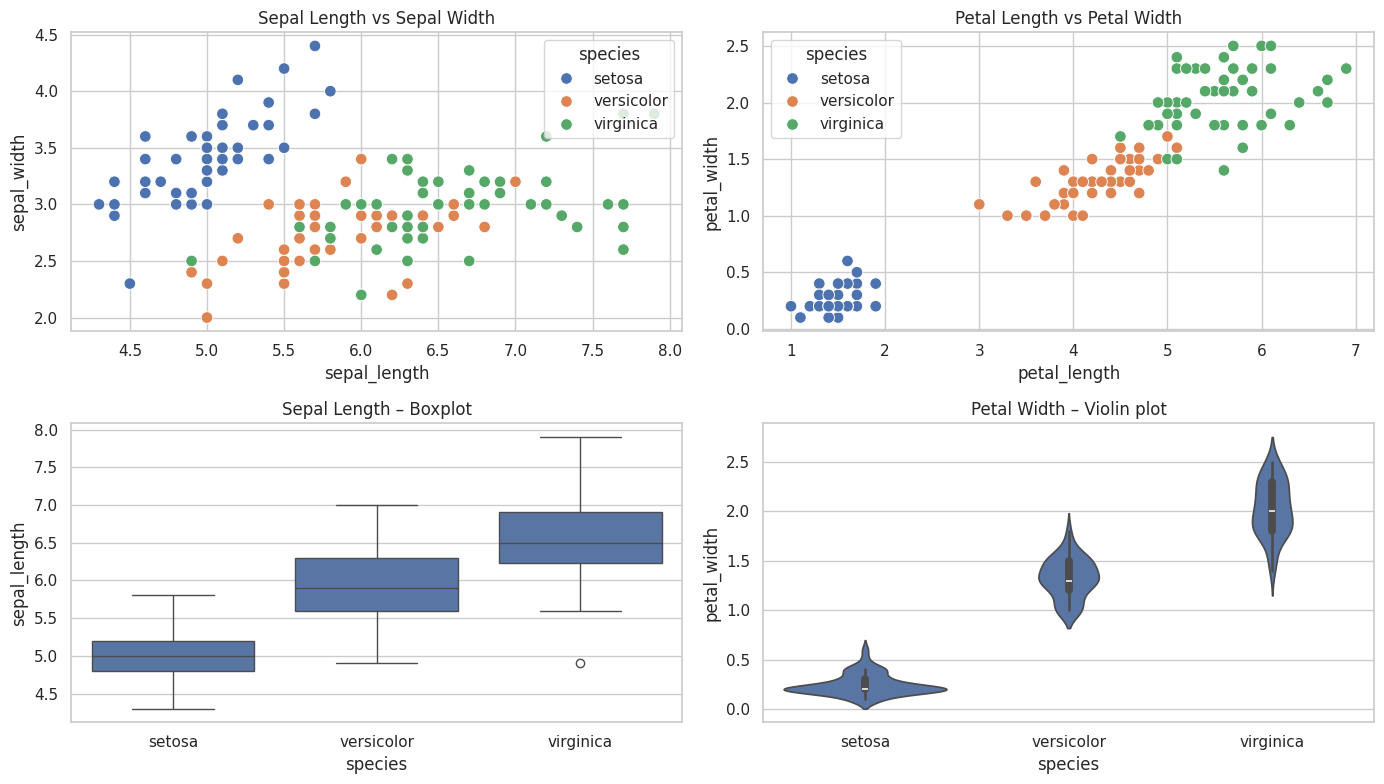

In [ ]:
# První způsob
plt.figure(figsize=(14,8))

plt.subplot(2,2,1)
sns.scatterplot(data=df, x='sepal_length', y='sepal_width', hue='species', s=70)
plt.title('Sepal Length vs Sepal Width')

plt.subplot(2,2,2)
sns.scatterplot(data=df, x='petal_length', y='petal_width', hue='species', s=70)
plt.title('Petal Length vs Petal Width')

plt.subplot(2,2,3)
sns.boxplot(x='species', y='sepal_length', data=df)
plt.title('Sepal Length – Boxplot')

plt.subplot(2,2,4)
sns.violinplot(x='species', y='petal_width', data=df)
plt.title('Petal Width – Violin plot')

plt.tight_layout()
plt.show()




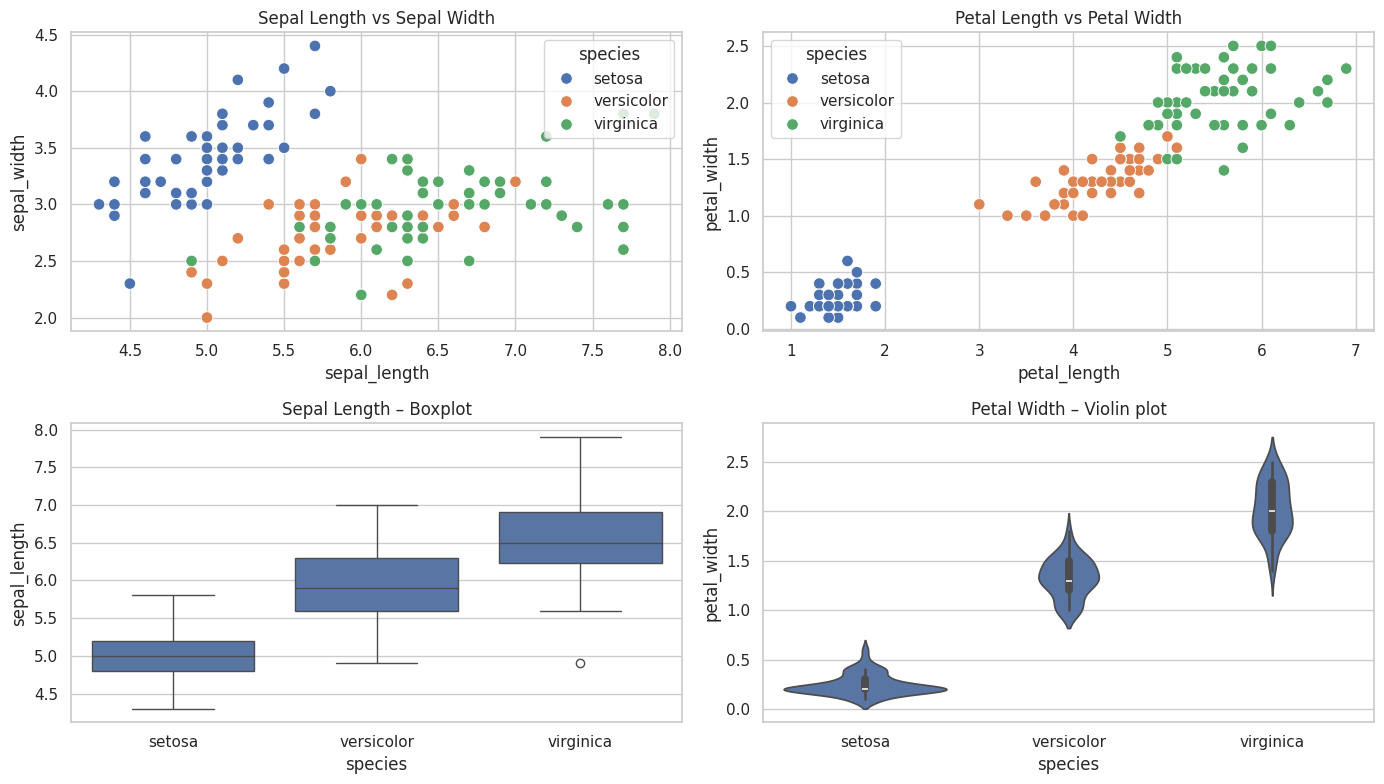

In [ ]:
# Druhý způsob

fig, axes = plt.subplots(2, 2, figsize=(14, 8))

sns.scatterplot(ax=axes[0, 0], data=df, x='sepal_length', y='sepal_width', hue='species', s=70)
axes[0, 0].set_title('Sepal Length vs Sepal Width')

sns.scatterplot(ax=axes[0, 1], data=df, x='petal_length', y='petal_width', hue='species', s=70)
axes[0, 1].set_title('Petal Length vs Petal Width')

sns.boxplot(ax=axes[1, 0], x='species', y='sepal_length', data=df)
axes[1, 0].set_title('Sepal Length – Boxplot')

sns.violinplot(ax=axes[1, 1], x='species', y='petal_width', data=df)
axes[1, 1].set_title('Petal Width – Violin plot')


plt.tight_layout()
plt.show()


# **Práce s datasetem**

Úkol 1. - Načtěte data ze souboru https://gist.githubusercontent.com/i-Zaak/fc8d871bfb22add42e382009598586a9/raw/67e86de17862c7c922a15fe9a9e1e3e7dd6bb08b/table1.csv do DataFrame s názvem df_cviceni. Vypište prvních 5 řádků.

In [ ]:
import pandas as pd



In [ ]:
df_cviceni.plot()

In [ ]:
df_cviceni['accuracy_pct'].plot()

In [ ]:
seaborn.histplot(data=df_cviceni, x='clinical_score', bins=20) #co znamená parametr bins?

In [ ]:
seaborn.boxplot(data=df_cviceni, x='group', y='clinical_score')

In [ ]:
seaborn.scatterplot(data=df_cviceni, x='reaction_time_ms', y='fmri_activation_dlpfc', hue='clinical_score')

In [ ]:
seaborn.heatmap(df_cviceni[['age', 'reaction_time_ms', 'accuracy_pct', 'working_memory_span', 'clinical_score']].corr(), annot=True)

# Úkoly

1. Vytvořte jednoduchý sloupcový graf zobrazující počet subjektů v každé 'group' z původního `df_cviceni`.
2. Vytvořte histogram sloupce 'age'. Použijte 15 binnů.
3. Vytvořte boxplot sloupce 'reaction_time_ms' rozdělený podle 'sex'.
4. Vytvořte houslový graf (violin plot) sloupce 'accuracy_pct' rozdělený podle 'group'.
5. Vytvořte scatter plot zobrazující vztah mezi 'age' a 'clinical_score'. Obarvěte body podle sloupce 'group'.
6. Vytvořte regresní graf (regplot) pro sloupce 'working_memory_span' a 'fmri_activation_dlpfc'.

In [ ]:
# Zde napište kód pro úkol 1


In [ ]:
# Zde napište kód pro úkol 2


In [ ]:
# Zde napište kód pro úkol 3


In [ ]:
# Zde napište kód pro úkol 4


In [ ]:
# Zde napište kód pro úkol 5


In [ ]:
# Zde napište kód pro úkol 6


# Úkoly 2

1. Vykreslete histogramy všech numerických sloupců do jednotlivých subplotů (age, reaction_time_ms, accuracy_pct, clinical_score, working_memory_span, fmri_activation_dlpfc).


2. Vytvořte boxploty podle skupin - pro každý numerický sloupec bude jeden subplot

3. Vytvoř subploty pro více regresních grafů (regplot) – working_memory_span vs fmri_activation_dlpfc, reaction_time_ms vs accuracy_pct, age vs clinical_score.

In [ ]:
# Zadejte kód z úkolu 1




In [ ]:
# Zadejte kód z úkolu 2



In [ ]:
# Zadejte kód z úkolu 3


## Komplexní příklad

1. Načtěte signál ve formátu .csv z odkazu pomocí numpy

 https://gist.githubusercontent.com/499987/536e5e81c243039a7eb5e996c6f0c1e2/raw/cdf7cfe5e4d578403ef0023d4bf7a69dd1afd3f3/ecg.csv

In [ ]:
# Zadejte kód

2. Vykreslete signál

In [ ]:
# Zadejte kód

In [ ]:
#Vykreslete jen část signálu

3. Popište osy, doplňte časovou řadu

In [ ]:
# Zadejte kód

4. Signál je vektor hodnot, který můžeme upravovat (filtrovat) a potom zobrazit přes sebe
- posune signál o 30 vzorků
- sníží amplitudu sinálu na polovinu
- posune signál nahoru o 0.2

In [ ]:
#Zadejte kód

5. Detekce R vln s vykreslením svislých červených čar kde se peak nachází a uložte jako .png - plt.savefig()


In [ ]:
from scipy.signal import find_peaks

In [ ]:
# Zadejte kód

Další ukázky

In [ ]:
# mohlo by nás zajímat, jak vypadá průměrný QRS komplex
# použijeme detekované peaky, vybere oblasti okolo nich a zobrazíme je přes sebe

for peak in peaks:
    qrs_segment = ecg[peak-20:peak+20]
    plt.plot(qrs_segment)
plt.show()



In [ ]:
# přepíšeme kód, aby se jednotlivé úseky sinálu prvně uložily, pak z nich kromě vizualizace budeme moci spočítat i průměr

segments = []
for peak in peaks:
    qrs_segment = ecg[peak-20:peak+20]
    segments.append(qrs_segment)

segments = np.array(segments)

plt.plot(segments.T)  # plt vykresluje sloupce, my máme data v řádcích
plt.show()

In [ ]:
mean_segment = np.mean(segments, axis=0)

plt.plot(segments.T, color='gray', alpha=0.3)
plt.plot(mean_segment, color='red', linewidth=1)
plt.show()

In [ ]:
fig, axes = plt.subplots(1, 2)

# vlevo jednotlivé úseky
axes[0].plot(segments.T, color='gray', alpha=0.3)
axes[0].set_title('Jednotlive úseky')

# vpravo průměr
axes[1].plot(mean_segment, color='red', linewidth=2)
axes[1].set_title('Průměrný QRS')

plt.tight_layout()
plt.show()

**Zadání**
- Rozdělte signál na segmetny po 2 sekundách (fs = 250)

- Použijte for cyklus, aby každý segment vykreslil jako samostatný lineplot

- Vykreslete všechny segmenty jako subploty vedle sebe

- Výsledný graf uložte do .png

In [ ]:
# Zadejte kód